# Predictions in Best Picture-winning Films Using Machine Learning

## INFO 1998 Fall 2023 Final Project

### Lauren Jun

**Introduction**

The following project will attempt to understand what trends there are in the types of films that receive Best Picture awards and predict the films that may be in the running for the 2024 Academy Awards. It will utilize machine learning techniques and models learned throughout the duration of INFO 1998.

By visualizing data, predicting trends, and applying models, we can hopefully gain more insight into what factors of films are award-winning.

***Research Question***

Are there trends in the types of films that receive awards, and do these trends change over time?

***Hypothesis***

The types of films that win awards vary over time, reflecting changing cultural and industry trends.

***Overall Goal***

Measuring patterns in Best Picture winners at the Academy Awards

**Approach**

1. Data Cleaning
2. Visualization
3. Machine Learning
4. Analysis & Prediction

## Data Cleaning

First, we will import necessary modules.

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Next, we will import the data. This data includes useful information, including:
- year of release
- audience rating
- movie genre
- etc.

**Sources:**

- 'Oscar Best Picture Movies' by Martin Mraz from Kaggle
https://www.kaggle.com/datasets/martinmraz07/oscar-movies/
- 'Budget and Gross' Self-Created Dataset (using information on each film from their IMDB pages)

**Kaggle Dataset**

In [343]:
oscars_df = pd.read_csv('oscars.csv')

This dataset contains information about Best Picture nominated films from the early 1900s all the way to 2020. However, there are many missing values, so we will remove those and the data that is not relevant to this project.

In [344]:
display(oscars_df.head())

,Film,Oscar Year,Film Studio/Producer(s),Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Movie Info,...,Tomatometer Status,Tomatometer Rating,Tomatometer Count,Audience Status,Audience Rating,Audience Count,Tomatometer Top Critics Count,Tomatometer Fresh Critics Count,Tomatometer Rotten Critics Count,Film ID
0,It Happened One Night,1934,Columbia,Winner,1934,105,"Comedy,Romance",8.1,"98,409","In Frank Capra's acclaimed romantic comedy, sp...",...,Certified-Fresh,98.0,60.0,Upright,93.0,33678.0,15.0,59.0,1.0,88fe2d2b-3e07-4c9f-9978-388b4f7b0c93
1,The Barretts of Wimpole Street,1934,Metro-Goldwyn-Mayer,Nominee,1934,109,"Biography,Drama,Romance",7.0,"1,795",Remarkable poet Elizabeth Barrett (Norma Shear...,...,Fresh,78.0,9.0,Upright,69.0,335.0,3.0,7.0,2.0,d66f2e6e-b9a6-4f20-972b-315f3998b5a4
2,Cleopatra,1934,Paramount,Nominee,1934,100,"Biography,Drama,History",6.8,"3,678",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30a8cacf-0902-4d8c-9c02-934c09e284a6
3,Flirtation Walk,1934,First National,Nominee,1934,97,"Musical,Romance",5.7,700,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97e60fc4-5f01-412e-b350-075f1c78939f
4,The Gay Divorcee,1934,RKO Radio,Nominee,1934,107,"Comedy,Musical,Romance",7.5,"7,455","In this beloved musical, Mimi Glossop (Ginger ...",...,Fresh,93.0,14.0,Upright,82.0,3378.0,0.0,13.0,1.0,4cff46f4-7853-40a0-9b52-39643b2d257a


In [345]:
oscars_df.drop(columns=['Film Studio/Producer(s)'], axis=1, inplace=True)
oscars_df.drop(columns=['Year of Release'], axis=1, inplace=True)
oscars_df.drop(columns=['Movie Time'], axis=1, inplace=True)
oscars_df.drop(columns=['Movie Info'], axis=1, inplace=True)
oscars_df.drop(columns=['Genres'], axis=1, inplace=True)
oscars_df.drop(columns=['Critic Consensus'], axis=1, inplace=True)
oscars_df.drop(columns=['Content Rating'], axis=1, inplace=True)
oscars_df.drop(columns=['Directors'], axis=1, inplace=True)
oscars_df.drop(columns=['Authors'], axis=1, inplace=True)
oscars_df.drop(columns=['Actors'], axis=1, inplace=True)
oscars_df.drop(columns=['Original Release Date'], axis=1, inplace=True)
oscars_df.drop(columns=['Streaming Release Date'], axis=1, inplace=True)
oscars_df.drop(columns=['Production Company'], axis=1, inplace=True)
oscars_df.drop(columns=['Tomatometer Status'], axis=1, inplace=True)
oscars_df.drop(columns=['Tomatometer Rating'], axis=1, inplace=True)
oscars_df.drop(columns=['Tomatometer Count'], axis=1, inplace=True)
oscars_df.drop(columns=['Audience Status'], axis=1, inplace=True)
oscars_df.drop(columns=['Audience Rating'], axis=1, inplace=True)
oscars_df.drop(columns=['Audience Count'], axis=1, inplace=True)
oscars_df.drop(columns=['Tomatometer Top Critics Count'], axis=1, inplace=True)
oscars_df.drop(columns=['Tomatometer Fresh Critics Count'], axis=1, inplace=True)
oscars_df.drop(columns=['Tomatometer Rotten Critics Count'], axis=1, inplace=True)
oscars_df.drop(columns=['Film ID'], axis=1, inplace=True)


display(oscars_df.head())

,Film,Oscar Year,Award,Movie Genre,IMDB Rating,IMDB Votes
0,It Happened One Night,1934,Winner,"Comedy,Romance",8.1,"98,409"
1,The Barretts of Wimpole Street,1934,Nominee,"Biography,Drama,Romance",7.0,"1,795"
2,Cleopatra,1934,Nominee,"Biography,Drama,History",6.8,"3,678"
3,Flirtation Walk,1934,Nominee,"Musical,Romance",5.7,700
4,The Gay Divorcee,1934,Nominee,"Comedy,Musical,Romance",7.5,"7,455"


We want to add another measure of evaluating the success or popularity of a film. Therefore, I replace the commas in the 'IMDB Votes' columns, and change the data type from object to integer.

In [346]:
oscars_df['IMDB Votes'] = oscars_df['IMDB Votes'].str.replace(',', '')
oscars_df['IMDB Votes'] = oscars_df['IMDB Votes'].astype(int)
print(oscars_df.dtypes)

display(oscars_df.head())

Film            object
Oscar Year       int64
Award           object
Movie Genre     object
IMDB Rating    float64
IMDB Votes       int32
dtype: object


,Film,Oscar Year,Award,Movie Genre,IMDB Rating,IMDB Votes
0,It Happened One Night,1934,Winner,"Comedy,Romance",8.1,98409
1,The Barretts of Wimpole Street,1934,Nominee,"Biography,Drama,Romance",7.0,1795
2,Cleopatra,1934,Nominee,"Biography,Drama,History",6.8,3678
3,Flirtation Walk,1934,Nominee,"Musical,Romance",5.7,700
4,The Gay Divorcee,1934,Nominee,"Comedy,Musical,Romance",7.5,7455


Next, we will add another column called 'IMDB Ratio'. The data for this column will be calculated by dividing the number of IMDB votes on a film by the IMDB rating of the film. This measure combines the popularity with the average rating, giving more context to the amount of positive or negative attention a film has received. Specifically, the resulting numbers can be interpreted as the number of votes per unit of rating, and higher values of this ratio indicate that a film has received more votes relative to its rating.

In [347]:
oscars_df['IMDB Ratio'] = oscars_df['IMDB Votes'] / oscars_df['IMDB Rating']
display(oscars_df.head())

,Film,Oscar Year,Award,Movie Genre,IMDB Rating,IMDB Votes,IMDB Ratio
0,It Happened One Night,1934,Winner,"Comedy,Romance",8.1,98409,12149.259259
1,The Barretts of Wimpole Street,1934,Nominee,"Biography,Drama,Romance",7.0,1795,256.428571
2,Cleopatra,1934,Nominee,"Biography,Drama,History",6.8,3678,540.882353
3,Flirtation Walk,1934,Nominee,"Musical,Romance",5.7,700,122.807018
4,The Gay Divorcee,1934,Nominee,"Comedy,Musical,Romance",7.5,7455,994.000000


**Self-Created Dataset**

For this dataset, I compiled box office gross and budget data on Best Picture nominated films from 2011 to 2020. From this data, we will be able to see if there is a significant similarity or difference between profits in winning films. This data was pulled from IMDB.

In [348]:
profit_df = pd.read_csv('profit.csv')
display(profit_df.head())

,Film,Box Office Gross Worldwide,Budget (Estimated)
0,It Happened One Night,NaN,NaN
1,The Barretts of Wimpole Street,NaN,NaN
2,Cleopatra,NaN,NaN
3,Flirtation Walk,NaN,NaN
4,The Gay Divorcee,NaN,NaN


In [349]:
profit_df['Profit'] = profit_df['Box Office Gross Worldwide'] - profit_df['Budget (Estimated)']
display(profit_df.head())

,Film,Box Office Gross Worldwide,Budget (Estimated),Profit
0,It Happened One Night,NaN,NaN,NaN
1,The Barretts of Wimpole Street,NaN,NaN,NaN
2,Cleopatra,NaN,NaN,NaN
3,Flirtation Walk,NaN,NaN,NaN
4,The Gay Divorcee,NaN,NaN,NaN


### Merged Dataset

In [350]:
merged_df = pd.merge(oscars_df, profit_df, on='Film', how='inner')
display(merged_df)

,Film,Oscar Year,Award,Movie Genre,IMDB Rating,IMDB Votes,IMDB Ratio,Box Office Gross Worldwide,Budget (Estimated),Profit
0,It Happened One Night,1934,Winner,"Comedy,Romance",8.1,98409,12149.259259,NaN,NaN,NaN
1,The Barretts of Wimpole Street,1934,Nominee,"Biography,Drama,Romance",7.0,1795,256.428571,NaN,NaN,NaN
2,Cleopatra,1934,Nominee,"Biography,Drama,History",6.8,3678,540.882353,NaN,NaN,NaN
3,Cleopatra,1934,Nominee,"Biography,Drama,History",6.8,3678,540.882353,NaN,NaN,NaN
4,Cleopatra,1963,Nominee,"Biography,Drama,History",7.0,31027,4432.428571,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
538,Mank,2020,Nominee,"Biography,Comedy,Drama",6.9,65380,9475.362319,NaN,NaN,NaN
539,Minari,2020,Nominee,Drama,7.5,57976,7730.133333,15282731.0,2000000.0,13282731.0
540,Promising Young Woman,2020,Nominee,"Crime,Drama,Thriller",7.5,122269,16302.533333,NaN,NaN,NaN
541,Sound of Metal,2020,Nominee,"Drama,Music",7.8,102807,13180.384615,516520.0,5400000.0,-4883480.0


## Data Visualization

We now look for trends in our data in order to understand what features of these films may be of interest. We’ll look for similarities between Best Picture-winning films, and determine if there have been changes over the years in certain features.

First, we will compare the IMDB Ratio for all films nominated for Best Picture in a single awards season. We will be able to see if winning films have a higher ratio like predicted or not.

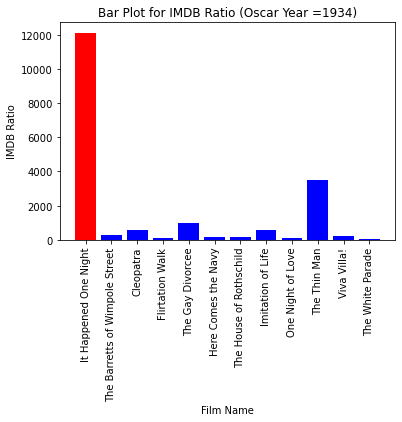

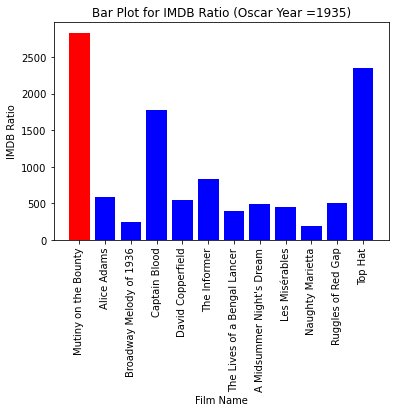

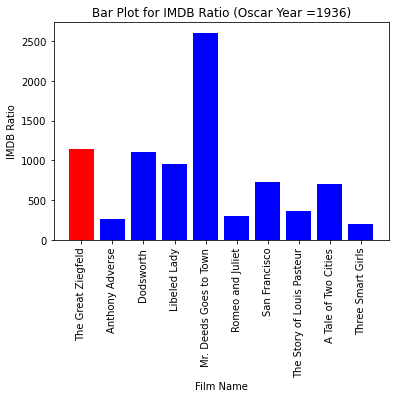

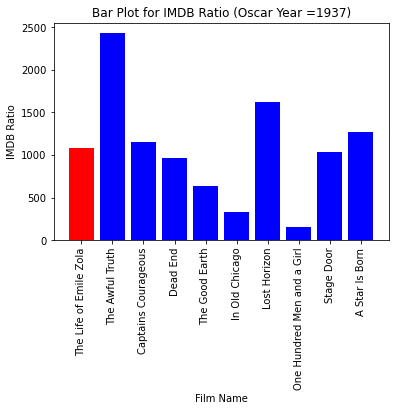

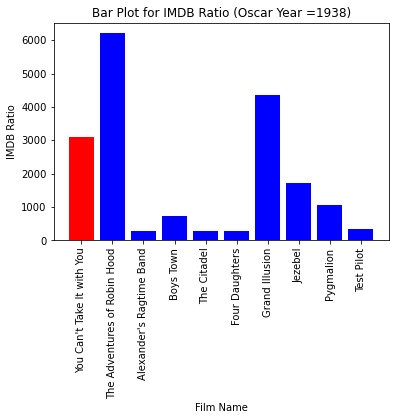

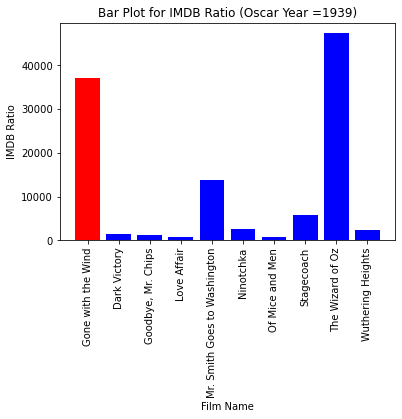

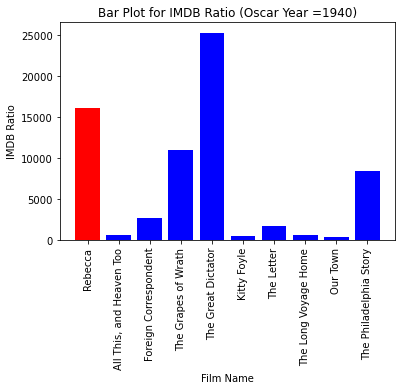

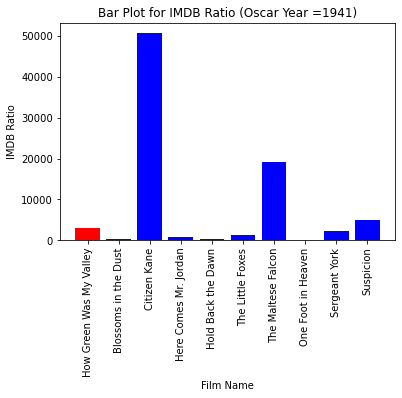

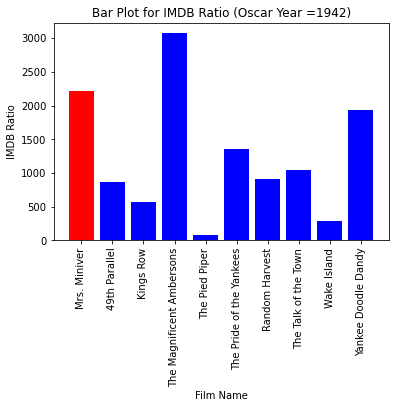

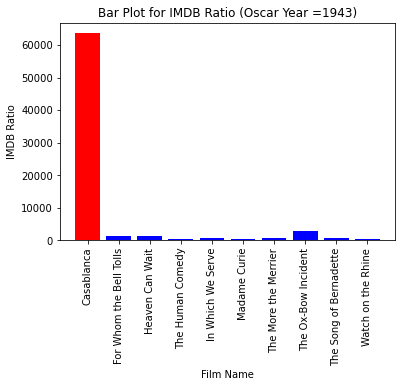

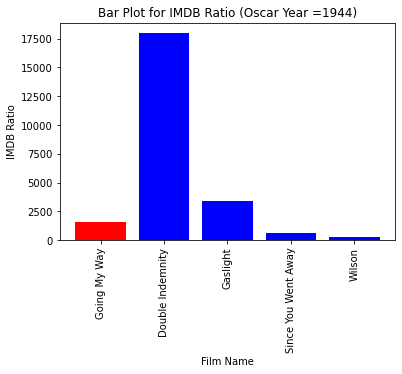

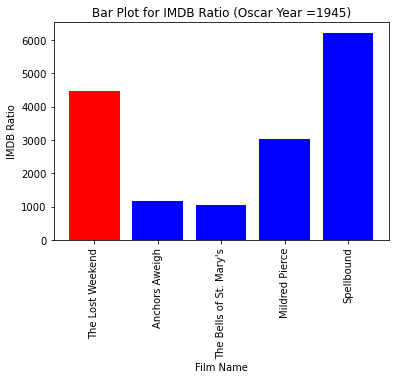

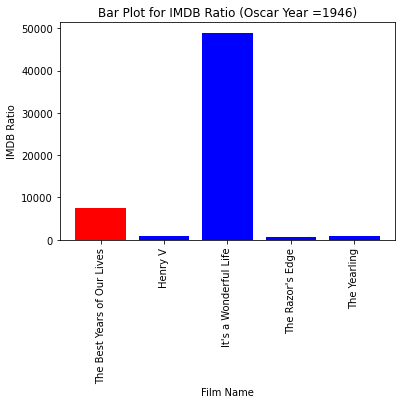

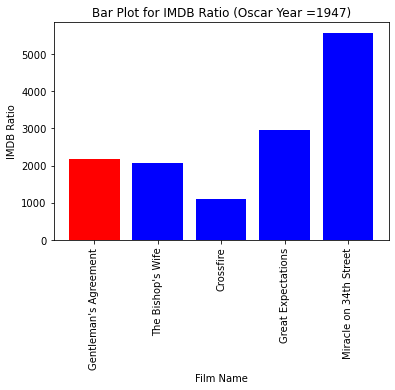

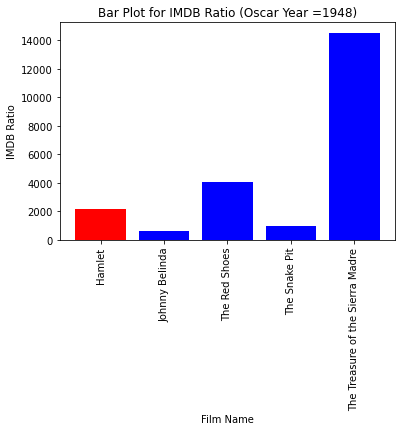

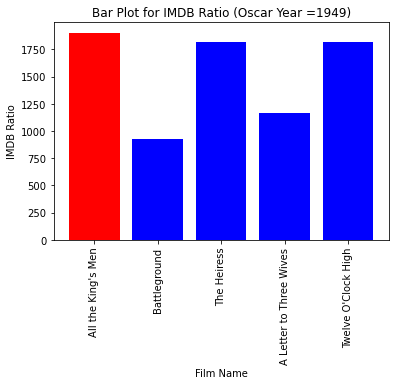

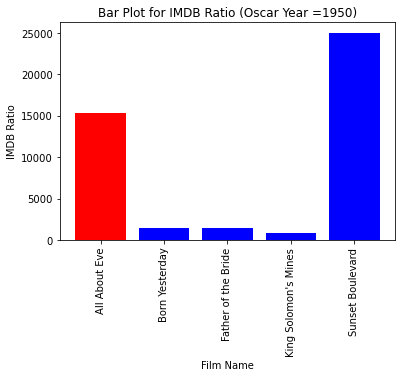

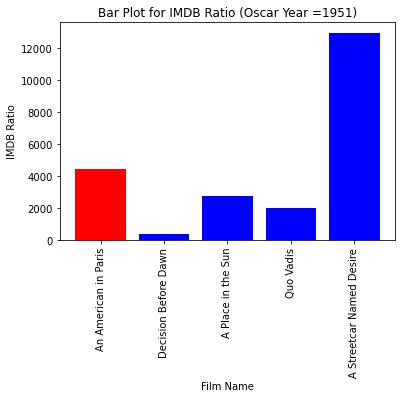

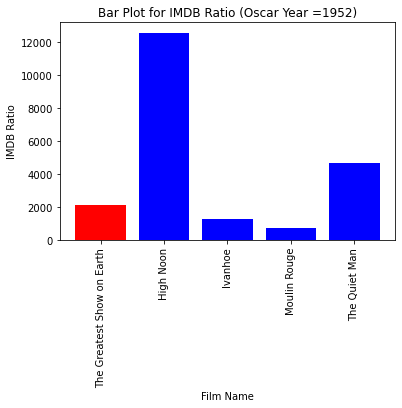

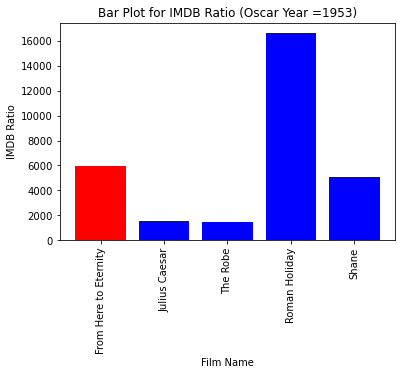

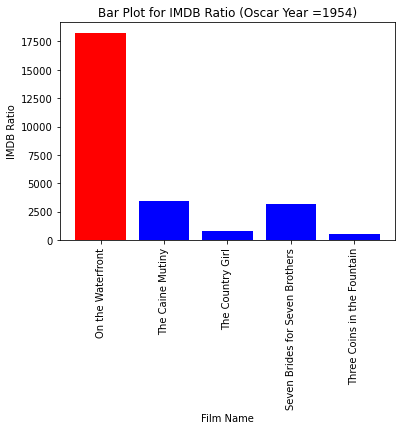

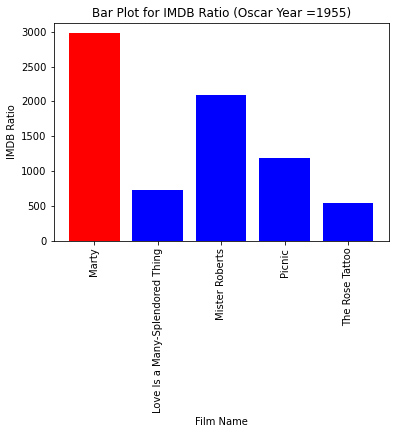

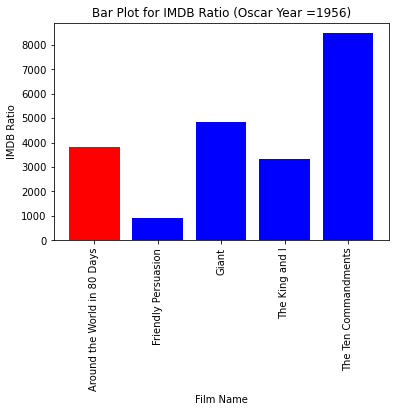

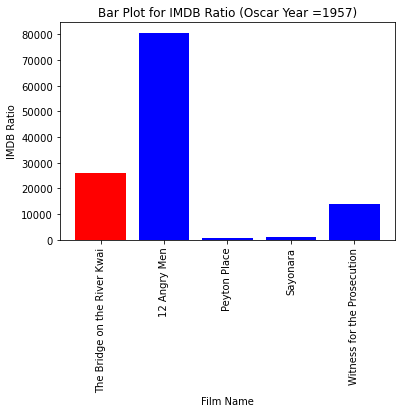

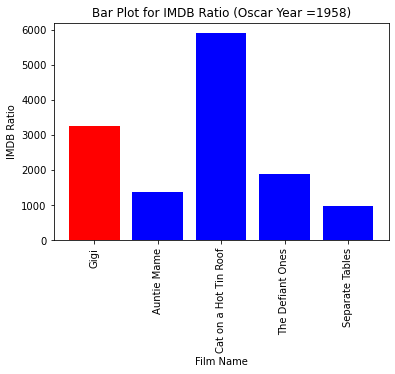

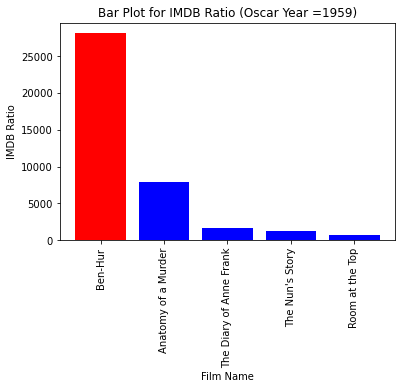

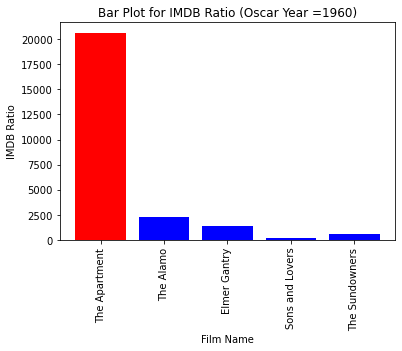

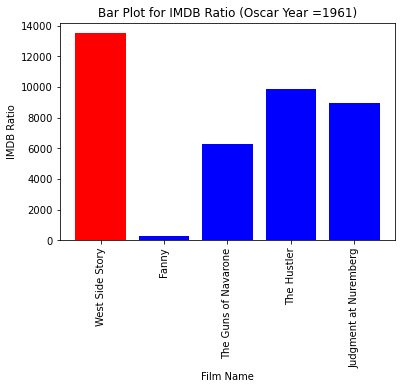

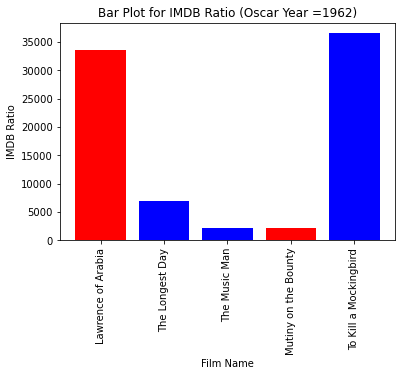

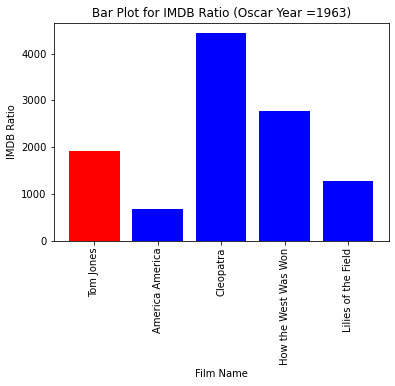

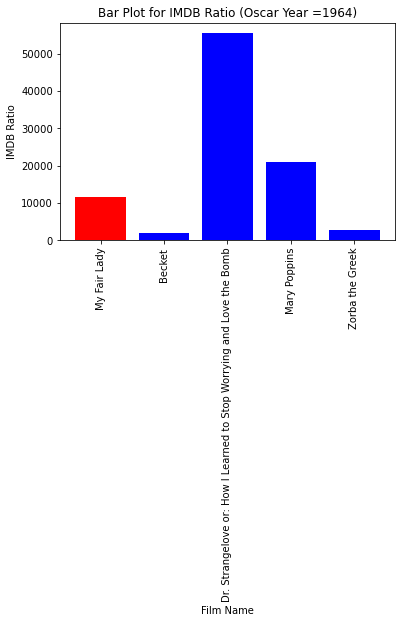

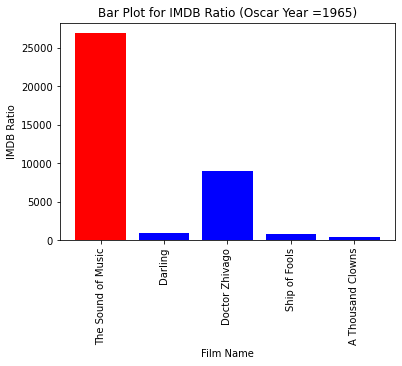

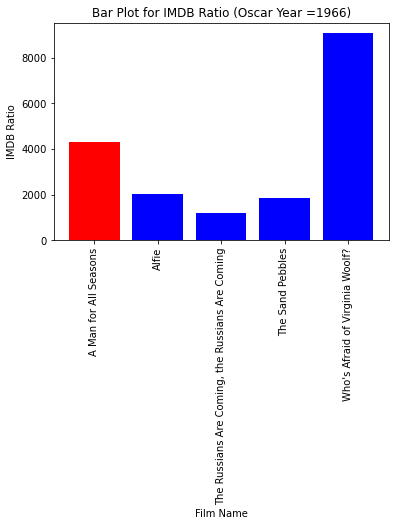

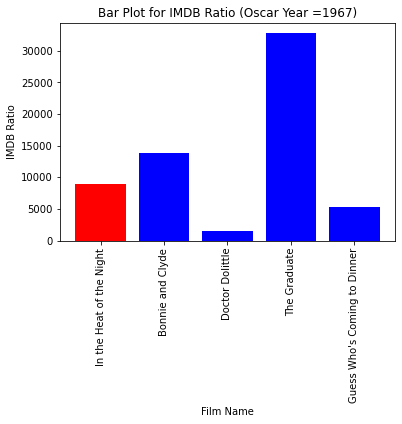

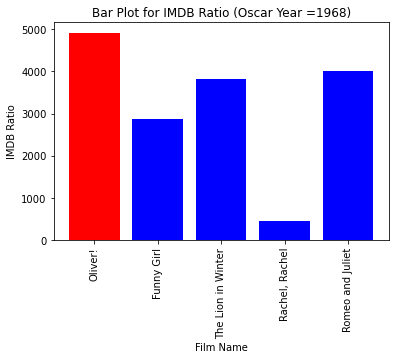

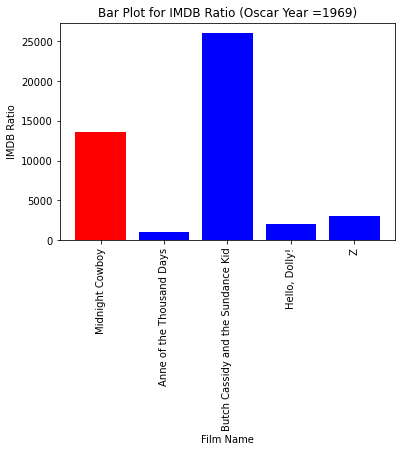

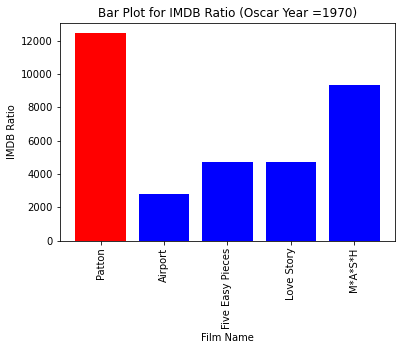

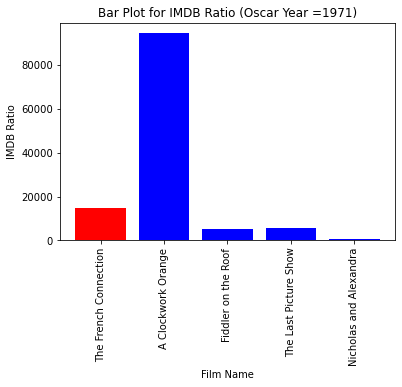

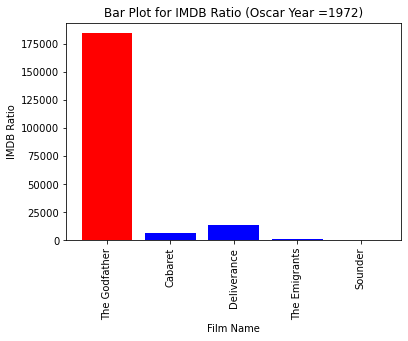

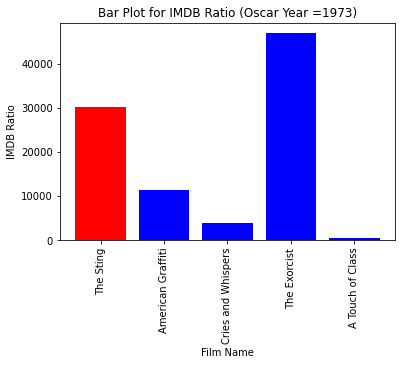

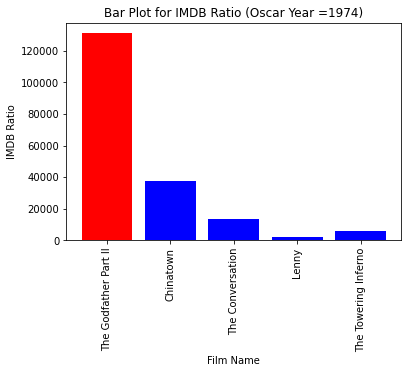

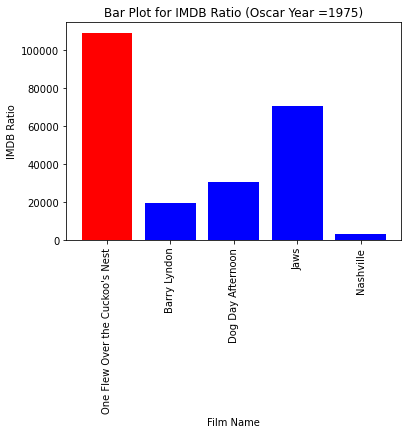

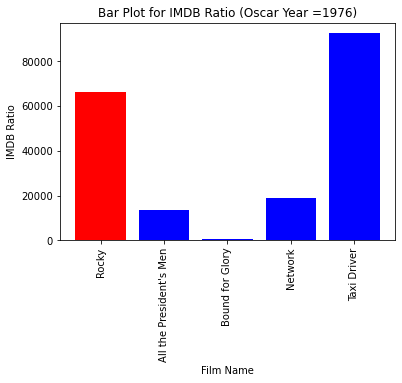

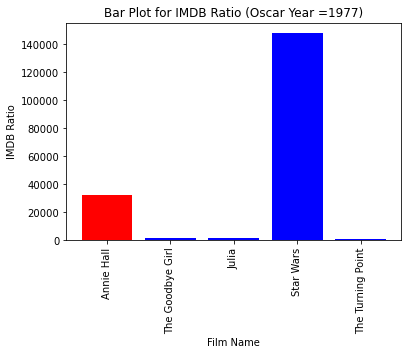

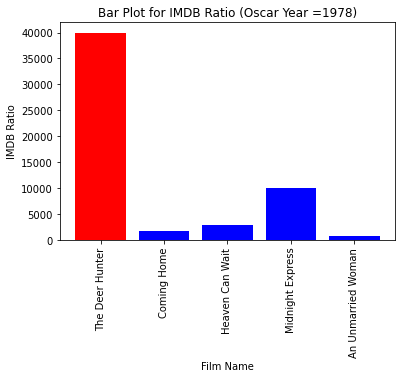

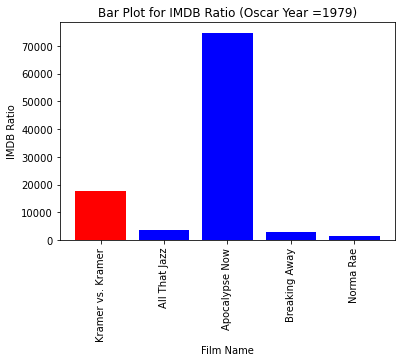

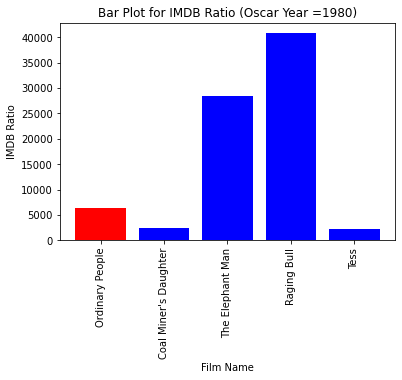

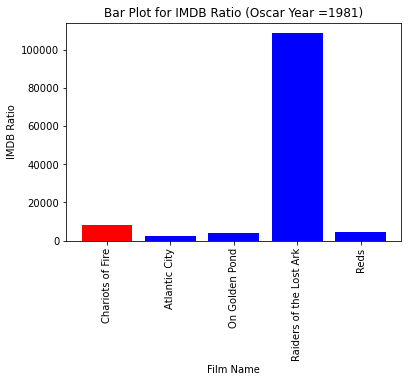

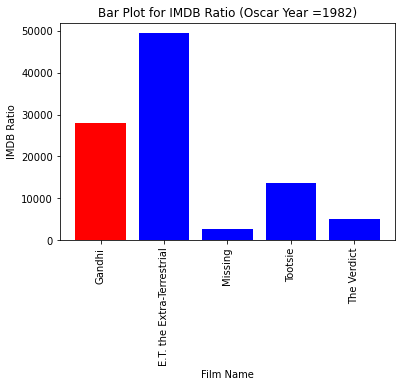

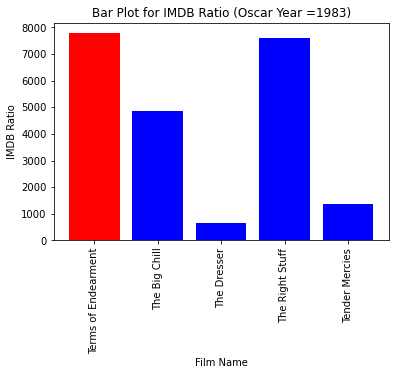

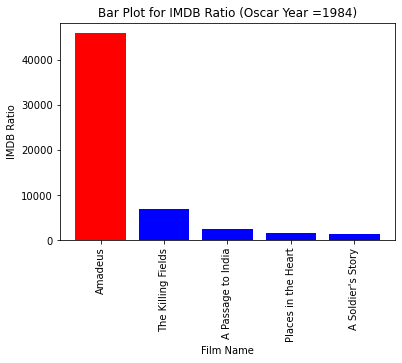

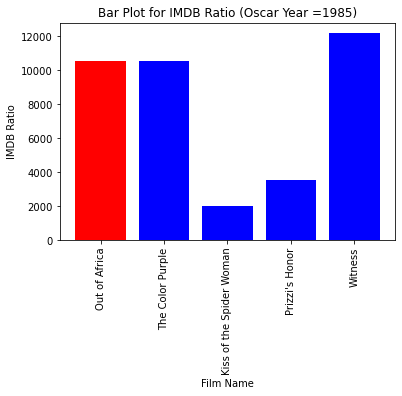

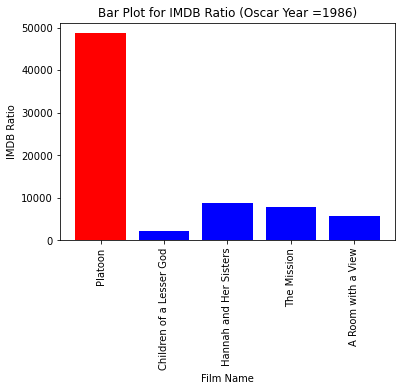

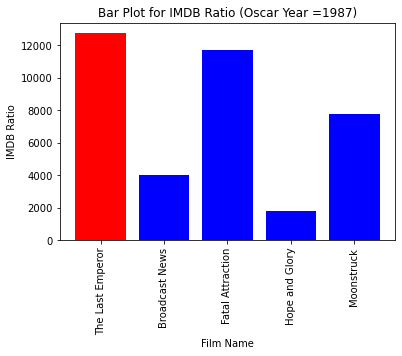

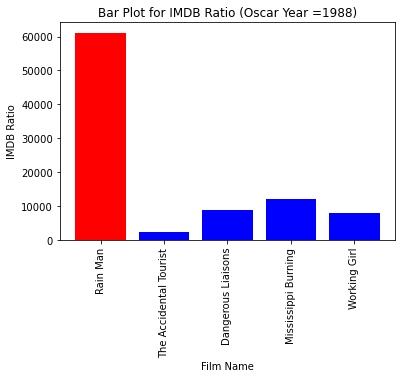

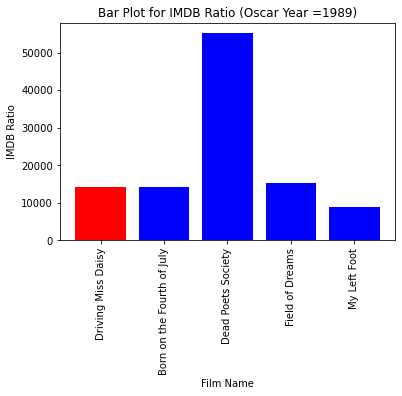

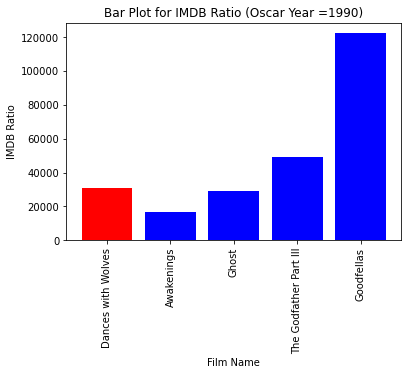

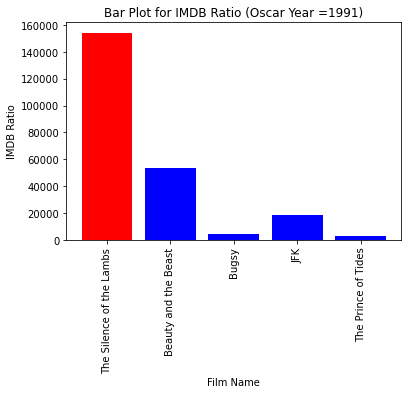

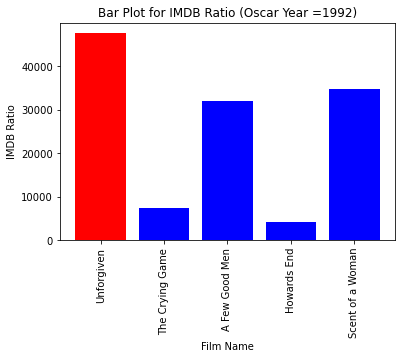

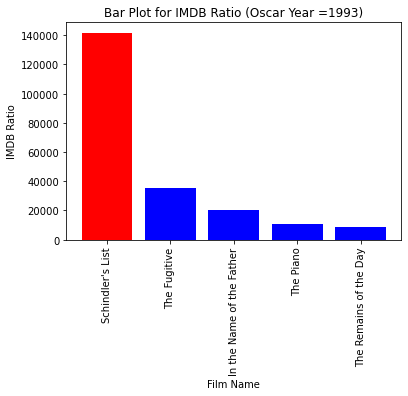

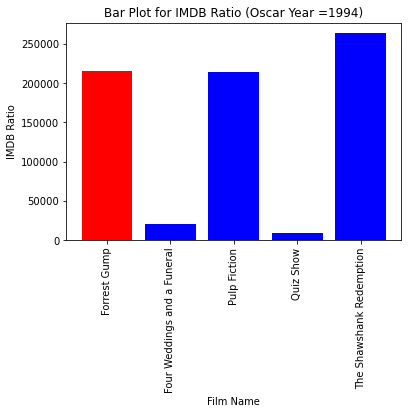

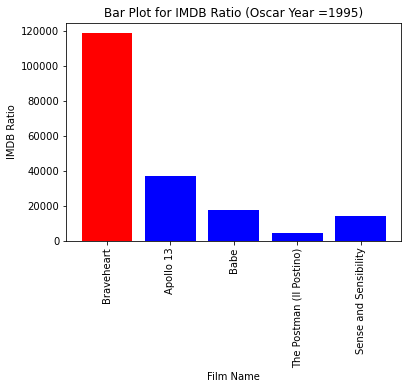

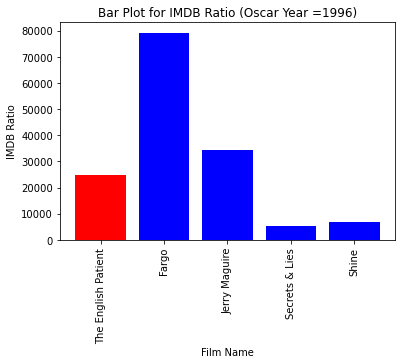

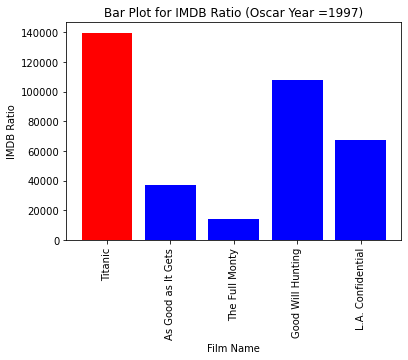

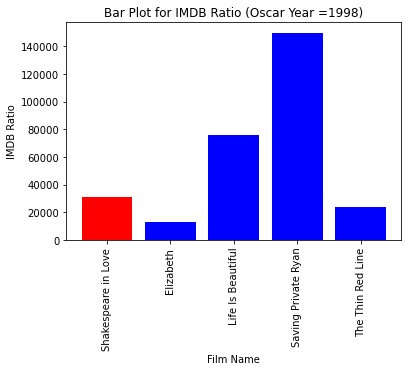

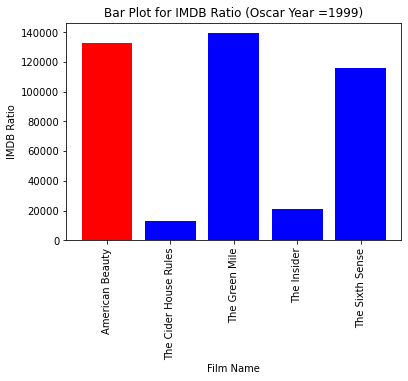

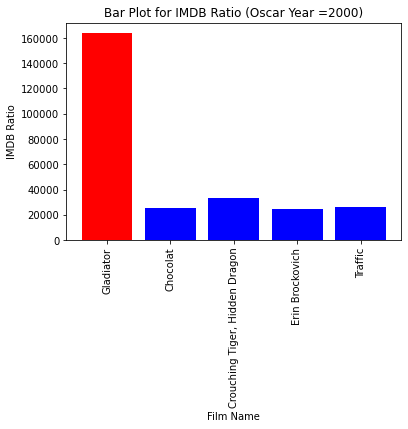

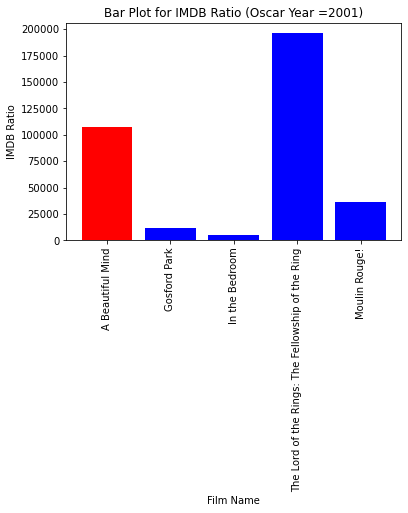

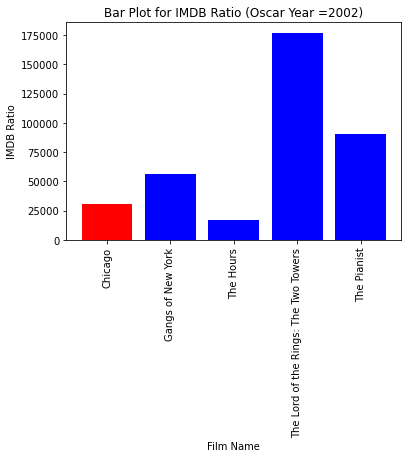

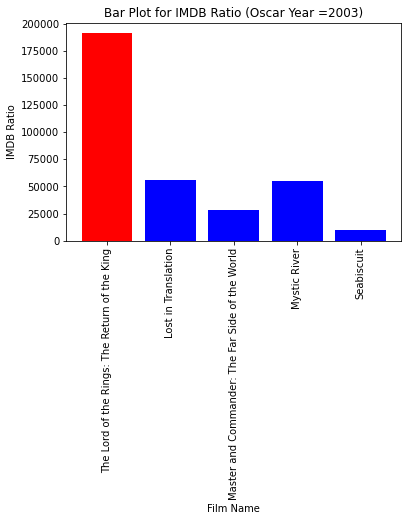

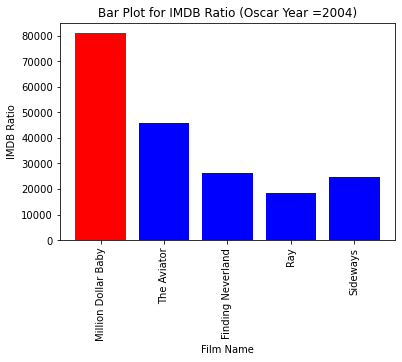

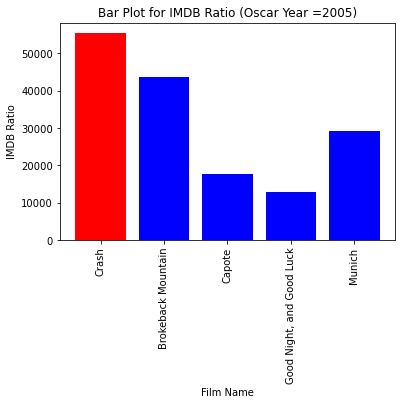

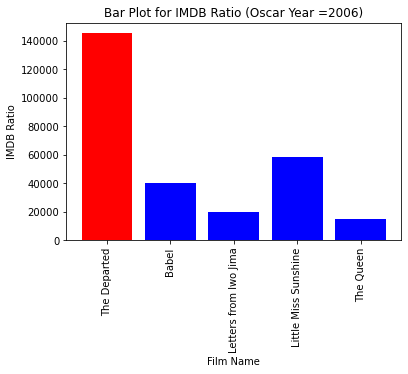

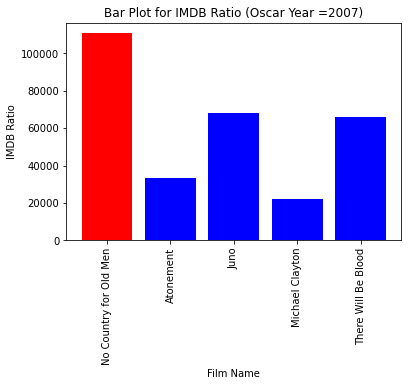

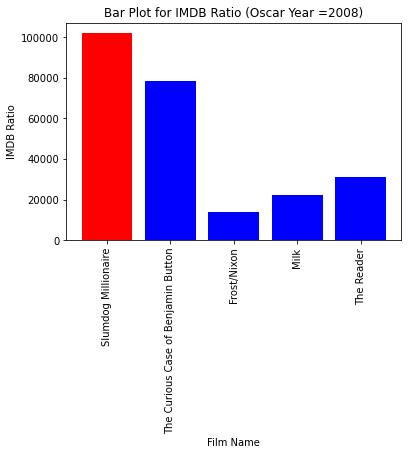

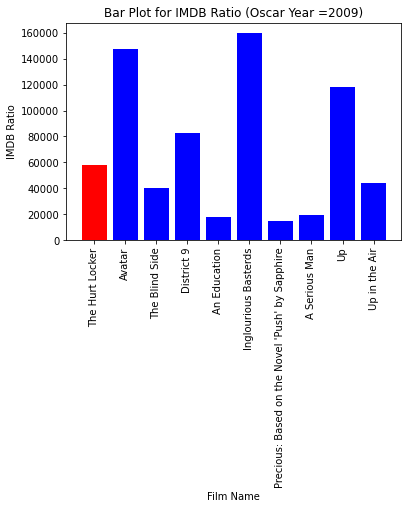

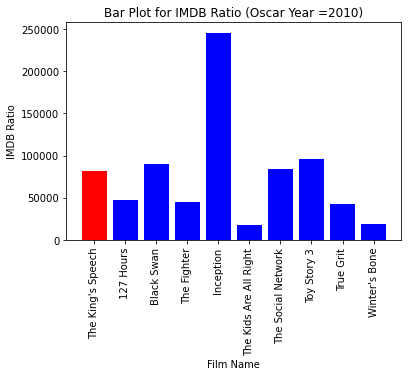

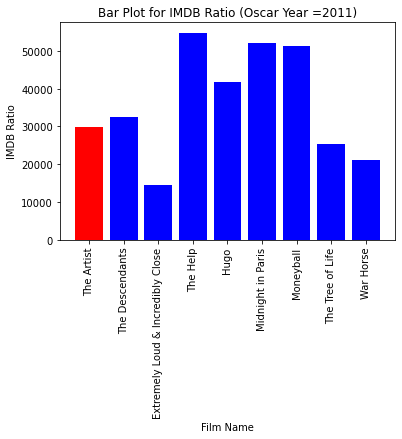

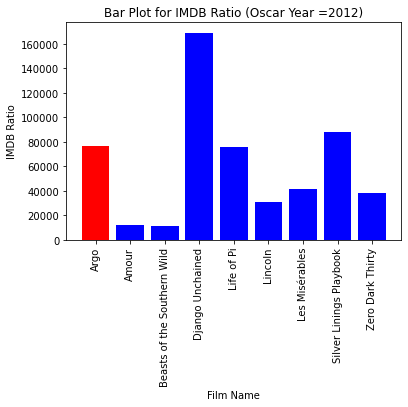

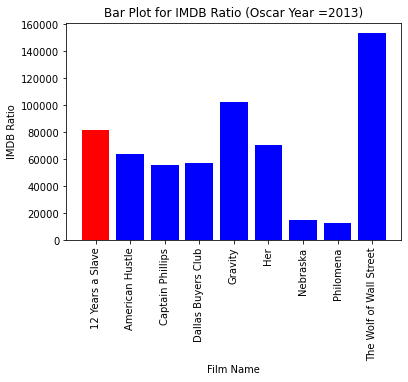

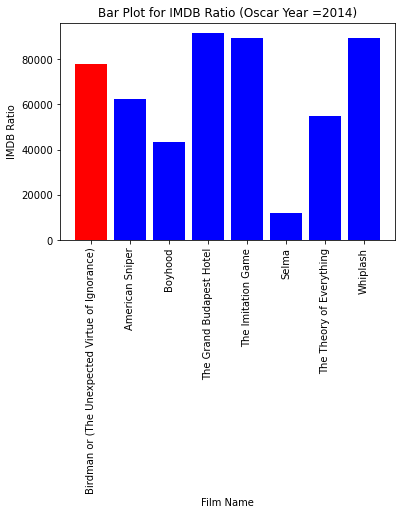

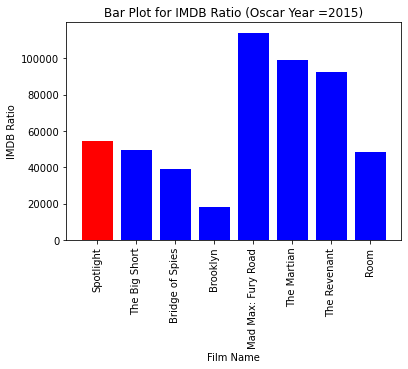

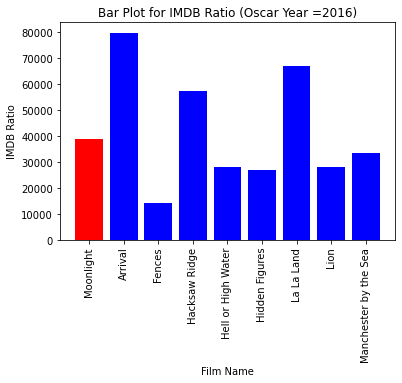

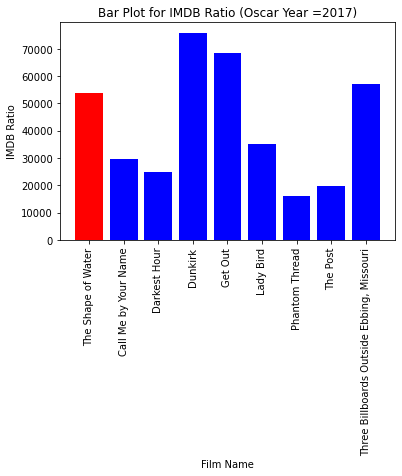

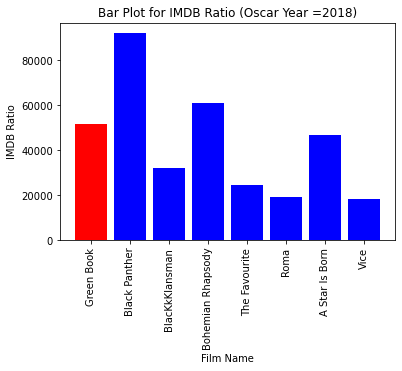

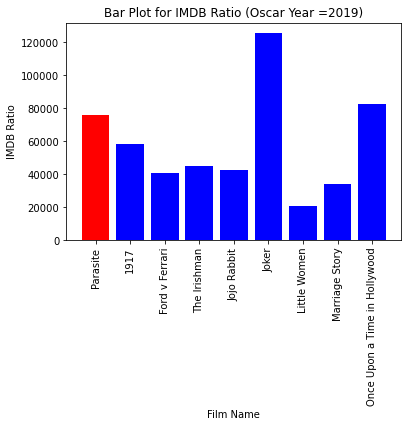

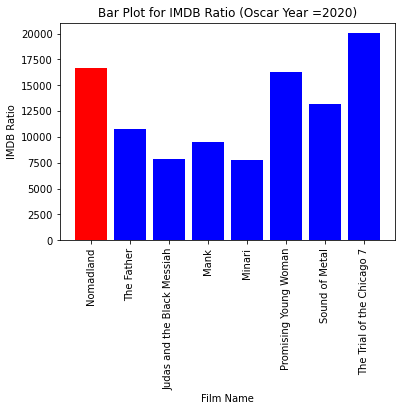

In [351]:
unique_years = oscars_df['Oscar Year'].unique()

for year in unique_years:
    unique_years_df = oscars_df[oscars_df['Oscar Year'] ==year]

    plt.bar(unique_years_df['Film'], unique_years_df['IMDB Ratio'], color=unique_years_df['Award'].map({'Nominee':'blue', 'Winner':'red'}))

    plt.xlabel('Film Name')  
    plt.ylabel('IMDB Ratio')
    plt.title(f'Bar Plot for IMDB Ratio (Oscar Year ={year})')
    plt.xticks(rotation='vertical')
    plt.show()

We notice that for earlier years, the winning film tends to have a higher IMDB Ratio in most cases. However, this can be simply attributed to the fact that IMDB was founded in 1990, so there may not be enough data for old films. Interestingly, if you take a look at more recent years, the winning film is does not necessarily have the most votes per unit rating. There are sometimes two or three nominees that are more highly rated than the winning film.

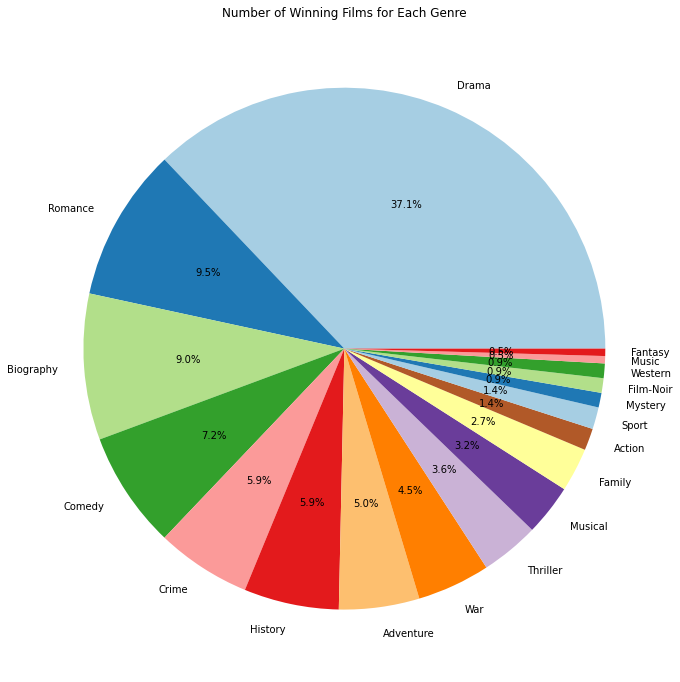

In [352]:
winners_df = oscars_df[oscars_df['Award'] == 'Winner']

all_genres = [genre.strip() for genres in winners_df['Movie Genre'].str.split(',') for genre in genres]
genre_counts = pd.Series(all_genres).value_counts()

plt.figure(figsize=(12, 12))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Number of Winning Films for Each Genre')
plt.show()

Through this visualization, we can infer that Best Picture winning films at the Oscars typically are of the Drama genre. Other popular genres include romance, biography, and comedy.

### Comparing Profit for Winning Films (2011-2020)

I decided to visualize profit for winning films in order to determine if more profitable films are generally winners of Best Picture at the Oscars. Overall, all the films that won Best Picture were profitable, but there was a big disparity in how much profit each film garnered. For example, Green Book (2018) had a profit of nearly 300 million, but Moonlight (2016) had a profit of about 61 million.

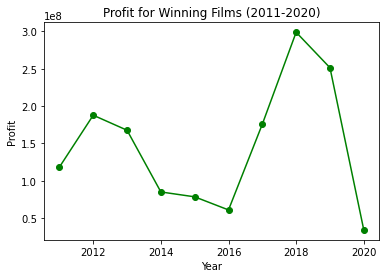

In [353]:
filtered_profit = merged_df[(merged_df['Oscar Year']>= 2011) & (merged_df['Oscar Year'] <= 2020) & (merged_df['Award'] == 'Winner')]

plt.plot(filtered_profit['Oscar Year'], filtered_profit['Profit'], marker='o', linestyle='-', color='green')
plt.title('Profit for Winning Films (2011-2020)')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

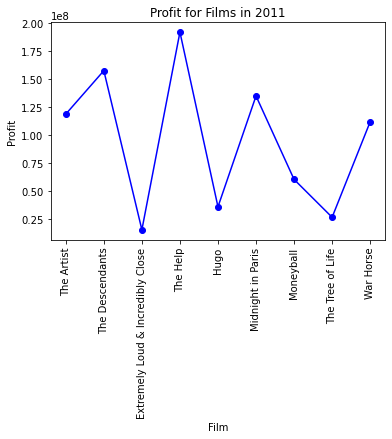

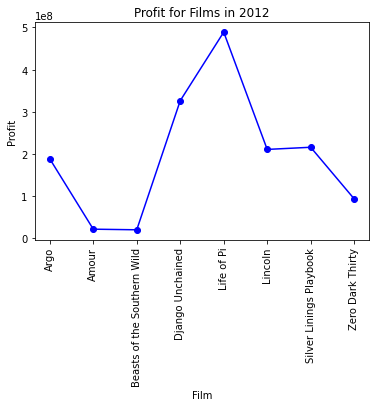

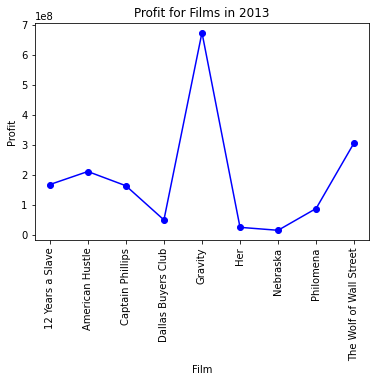

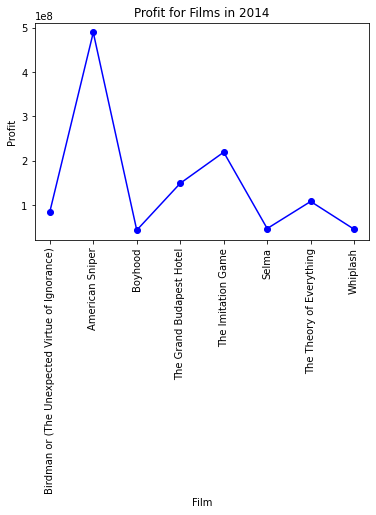

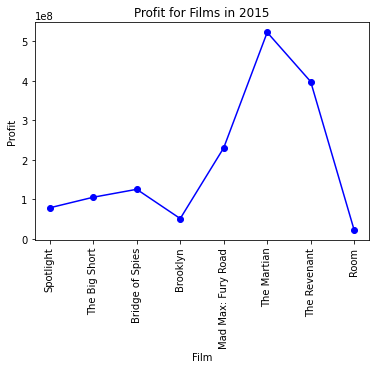

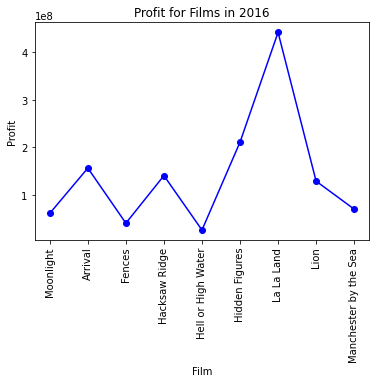

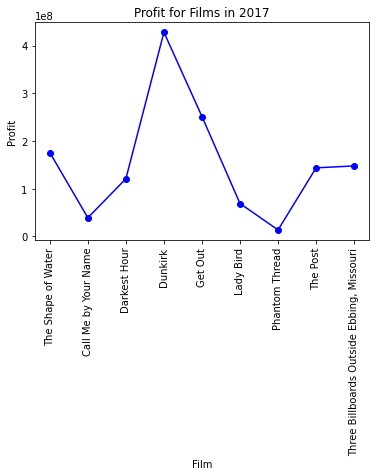

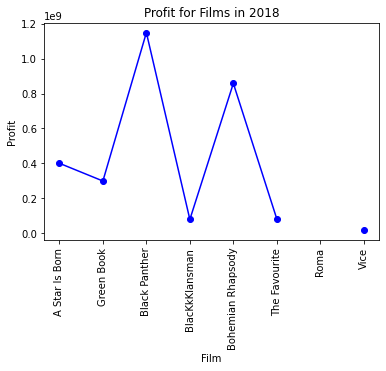

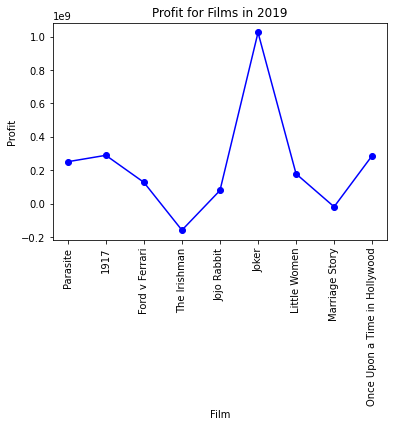

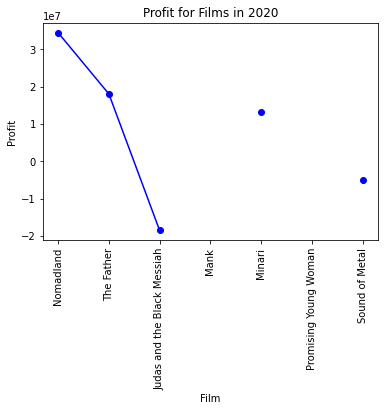

In [354]:
for year in range(2011, 2021):
    filtered_df = merged_df[merged_df['Oscar Year']==year]
    
    plt.plot(filtered_df['Film'], filtered_df['Profit'], color='blue', marker='o', linestyle='-')
    plt.title(f'Profit for Films in {year}')
    plt.xlabel('Film')
    plt.ylabel('Profit')
    plt.xticks(rotation='vertical')
    plt.show()

In the data visualizations above, the first film on the left is the winning film that year. For nearly all of the year (2011-2020), the film that won Best Picture did not generate the most profit out of all of its competitors. Interestingly, it was often not even the second or third more profitable film.

## Machine Learning

***Logistic Regression***

To begin, I will do a logistic regression to predict whether a film will win Best Picture by using IMDB Ratio as an input.

In [355]:
X = merged_df[['IMDB Ratio']]
y = merged_df['Award']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1998)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [356]:
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print('accuracy:', accuracy)

accuracy: 0.8676470588235294


In [357]:
print("training score:", model.score(X_train,y_train))
print("testing score:", model.score(X_test,y_test))

training score: 0.8230958230958231
testing score: 0.8676470588235294


In [358]:
coefficient = model.coef_[0]
print('coefficient:', coefficient)
intercept = model.intercept_[0]
print('intercept:',intercept)

coefficient: [-9.46418981e-06]
intercept: -6.522346761719945e-09


Text(0, 0.5, 'Award Outcome')

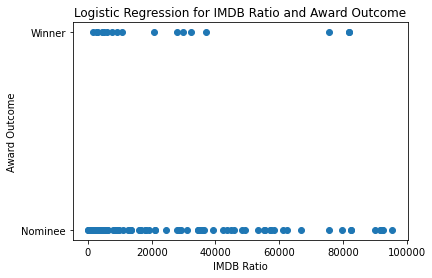

In [359]:
plt.scatter(X_test, y_test)
plt.title('Logistic Regression for IMDB Ratio and Award Outcome')
plt.xlabel('IMDB Ratio')
plt.ylabel('Award Outcome')

This regression tells me that Best Picture winning films do not always have higher IMDB Ratio (the number of votes per unit of rating) as might be expected.

***Logistic Regression***

In this model, I am utilizing two X inputs: Profit and IMDB Ratio. This model provides insight into the relationship between the features and the target variable (i.e. Award). We are trying to ascertain the impact that the X inputs have on whether or not a film wins the award.

I will use a subset of the merged dataframe in order to account for NaN values; this will allow us to take a closer look at films in more recent awards seasons.

In [360]:
subset = merged_df[(merged_df['Oscar Year'] >= 2011) & (merged_df['Oscar Year'] <= 2020)]
subset = subset.dropna()
display(subset.head())

subset['Award'] = subset['Award'].map({'Winner': 0, 'Nominee': 1})

,Film,Oscar Year,Award,Movie Genre,IMDB Rating,IMDB Votes,IMDB Ratio,Box Office Gross Worldwide,Budget (Estimated),Profit
54,A Star Is Born,2018,Nominee,"Drama,Music,Romance",7.6,354157,46599.605263,436433122.0,36000000.0,400433122.0
459,The Artist,2011,Winner,"Comedy,Drama,Romance",7.9,235457,29804.683544,133471171.0,15000000.0,118471171.0
460,The Descendants,2011,Nominee,"Comedy,Drama",7.3,236381,32380.958904,177243185.0,20000000.0,157243185.0
461,Extremely Loud & Incredibly Close,2011,Nominee,"Adventure,Drama,Mystery",6.9,99514,14422.318841,55247881.0,40000000.0,15247881.0
462,The Help,2011,Nominee,Drama,8.0,438666,54833.250000,216639112.0,25000000.0,191639112.0


In [361]:
X = subset_df[['Profit', 'IMDB Ratio']]
y = subset_df['Award']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1998)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [362]:
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print('accuracy:', accuracy)

accuracy: 0.8095238095238095


Text(0, 0.5, 'IMDB Ratio')

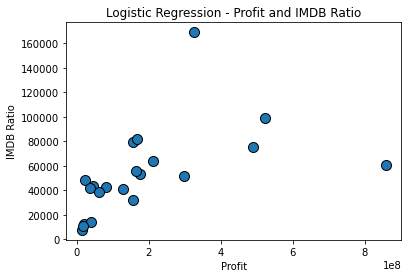

In [363]:
plt.scatter(X_test['Profit'], X_test['IMDB Ratio'], cmap='viridis', edgecolors='k', s=100)

plt.title('Logistic Regression - Profit and IMDB Ratio')
plt.xlabel('Profit')
plt.ylabel('IMDB Ratio')

***kNN Model***

Next, I will use a kNN classifier in order to garner more data regarding accuracy scores and the model's fit.

In [364]:
X = merged_df[['IMDB Ratio']]
y = merged_df['Award']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1998)

In [365]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
predictions = model2.predict(X_test)
print("accuracy:", accuracy_score(y_test, predictions)) 

accuracy: 0.8235294117647058


In [366]:
list_k = []
list_accuracy = []

for k in range(1,30):
    model2 = KNeighborsClassifier(k)
    model2.fit(X_train, y_train)
    predictions = model2.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    list_k.append(k)
    list_accuracy.append(accuracy)

Text(0, 0.5, 'accuracy')

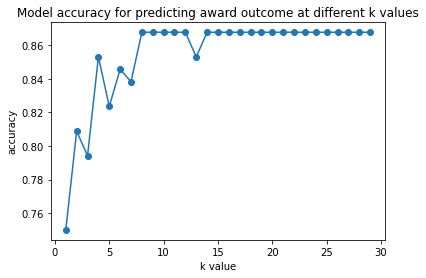

In [367]:
plt.plot(list_k, list_accuracy, marker='o')
plt.title('Model accuracy for predicting award outcome at different k values')
plt.xlabel('k value')
plt.ylabel('accuracy')

***Decision Tree Classifier***

I decided to use a decision tree classifier in order to better understand the importance of certain features and how significant their impact is on a film winning the Best Picture Oscar.

In [368]:
X = merged_df[['IMDB Ratio']]
y = merged_df['Award']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1998)

Text(0, 0.5, 'Test Score')

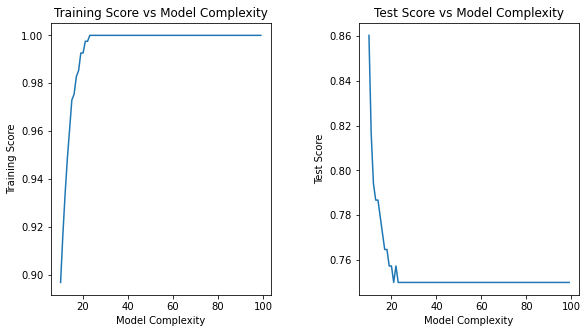

In [369]:
train_scores = []
test_scores = []

max_depths = list(range(10,100))
for i in max_depths:
    model3 = DecisionTreeClassifier(max_depth=i, random_state=1998)

    model3.fit(X_train, y_train)
    
    train_scores.append(model3.score(X_train, y_train))
    test_scores.append(model3.score(X_test, y_test))
    
plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.4)
    
plt.subplot(131)
plt.plot(max_depths, train_scores)
plt.title('Training Score vs Model Complexity')
plt.xlabel('Model Complexity')
plt.ylabel('Training Score')

plt.subplot(132)
plt.plot(max_depths, test_scores)
plt.title('Test Score vs Model Complexity')
plt.xlabel('Model Complexity')
plt.ylabel('Test Score')

## Analysis

**Predicting Nominees/Winner of Best Picture at the 2024 Oscars**

I will use Genre, IMDB Votes/Rating (Ratio), and Budget/Gross (Profit) to narrow down the top 20 picks and predict the winner. The dataset will be created using information on each film from IMDB.

Top 20 picks by Variety (https://variety.com/feature/2024-oscars-best-picture-predictions-1235612119/):
- Oppenheimer
- Barbie
- American Fiction
- Poor Things
- Killers of the Flower Moon
- The Holdovers
- Maestro
- May December
- The Zone of Interest
- Origin
- Past Lives
- Spider-Man: Across the Spider-Verse
- The Iron Claw
- Ferrari
- Air
- The Color Purple
- Saltburn
- The Taste of Things
- Anatomy of a Fall
- American Symphony

In [370]:
next_df = pd.read_csv('2024.csv')

In [371]:
display(next_df.head())

,Film,Genre,IMDB Rating,IMDB Votes,Budget,Gross
0,Oppenheimer,"Biography, Drama, History",8.5,517000.0,100000000.0,9.502455e+08
1,Barbie,"Adventure, Comedy, Fantasy",7.0,390000.0,100000000.0,1.441769e+09
2,American Fiction,"Comedy, Drama",7.8,396.0,NaN,NaN
3,Poor Things,"Romance, Sci-Fi",8.5,3500.0,NaN,NaN
4,Killers of the Flower Moon,"Crime, Drama, History",8.0,95000.0,200000000.0,1.518138e+08


In [372]:
next_df['IMDB Ratio'] = next_df['IMDB Votes'] / next_df['IMDB Rating']
next_df['Profit'] = next_df['Gross'] - next_df['Budget']
display(next_df.head())

,Film,Genre,IMDB Rating,IMDB Votes,Budget,Gross,IMDB Ratio,Profit
0,Oppenheimer,"Biography, Drama, History",8.5,517000.0,100000000.0,9.502455e+08,60823.529412,8.502455e+08
1,Barbie,"Adventure, Comedy, Fantasy",7.0,390000.0,100000000.0,1.441769e+09,55714.285714,1.341769e+09
2,American Fiction,"Comedy, Drama",7.8,396.0,NaN,NaN,50.769231,NaN
3,Poor Things,"Romance, Sci-Fi",8.5,3500.0,NaN,NaN,411.764706,NaN
4,Killers of the Flower Moon,"Crime, Drama, History",8.0,95000.0,200000000.0,1.518138e+08,11875.000000,-4.818621e+07


In [373]:
drama_films = next_df[next_df['Genre'].str.contains('Drama')]
display(drama_films)

,Film,Genre,IMDB Rating,IMDB Votes,Budget,Gross,IMDB Ratio,Profit
0,Oppenheimer,"Biography, Drama, History",8.5,517000.0,100000000.0,950245530.0,60823.529412,850245530.0
2,American Fiction,"Comedy, Drama",7.8,396.0,NaN,NaN,50.769231,NaN
4,Killers of the Flower Moon,"Crime, Drama, History",8.0,95000.0,200000000.0,151813788.0,11875.000000,-48186212.0
5,The Holdovers,"Comedy, Drama",8.4,6200.0,NaN,12889285.0,738.095238,NaN
6,Maestro,"Biography, Drama, Music",7.0,1100.0,NaN,3291.0,157.142857,NaN
7,May December,"Comedy, Drama",7.5,2300.0,NaN,223505.0,306.666667,NaN
8,The Zone of Interest,"Drama, History, War",8.1,1300.0,NaN,NaN,160.493827,NaN
9,Origin,"Drama, History",5.9,289.0,NaN,NaN,48.983051,NaN
10,Past Lives,"Drama, Romance",8.0,43000.0,NaN,19905363.0,5375.000000,NaN
12,The Iron Claw,"Biography, Drama, Sport",NaN,NaN,20400000.0,NaN,NaN,NaN


In [374]:
sorted_movies = drama_films.sort_values(by='IMDB Ratio', ascending=False)
display(sorted_movies)

,Film,Genre,IMDB Rating,IMDB Votes,Budget,Gross,IMDB Ratio,Profit
0,Oppenheimer,"Biography, Drama, History",8.5,517000.0,100000000.0,950245530.0,60823.529412,850245530.0
14,Air,"Drama, Sport",7.4,151000.0,90000000.0,90060106.0,20405.405405,60106.0
4,Killers of the Flower Moon,"Crime, Drama, History",8.0,95000.0,200000000.0,151813788.0,11875.000000,-48186212.0
10,Past Lives,"Drama, Romance",8.0,43000.0,NaN,19905363.0,5375.000000,NaN
18,Anatomy of a Fall,"Crime, Drama, Thriller",7.9,16000.0,6780227.0,17717664.0,2025.316456,10937437.0
16,Saltburn,"Comedy, Drama, Thriller",7.5,5600.0,NaN,6197279.0,746.666667,NaN
5,The Holdovers,"Comedy, Drama",8.4,6200.0,NaN,12889285.0,738.095238,NaN
7,May December,"Comedy, Drama",7.5,2300.0,NaN,223505.0,306.666667,NaN
13,Ferrari,"Biography, Drama, History",6.7,1200.0,110000000.0,NaN,179.104478,NaN
8,The Zone of Interest,"Drama, History, War",8.1,1300.0,NaN,NaN,160.493827,NaN


Predicted winner: Oppenheimer

Based on the information and analysis gathered from the data visualization and machine learning models, I predicted Oppenheimer as a potential winner for Best Picture at next year's Oscars, given the trend of Best Picture winners being of the Drama genre and its success at the box office and with critics.

## Conclusion

In this project, I sought to answer the question: "Are there trends in the types of films that receive awards, and do these trends change over time?"

I analyzed the data by creating machine learning models and using a train test split. I utilized a logistic regression for IMDB Ratio and Award Outcome in order to explore if IMDB Rating and Votes had an effect on whether or not a film was merely a Nominee or also a Winner. Interestingly, there wasn't a cluster of points with a high ratio for films that won Best Picture like I expected. I also utilized a KNN classifier to determine accuracy and a decision tree classifier to visualize model complexity versus training and test scores, respectively. I found that films of the Drama Genre tend to win Best Picture, but these films are not necessarily the best scoring films among the nominees in IMDB statistics and at the box office.

I also pulled the Top 20 picks that were tapped as possibly being nominated for Best Picture at next year's Oscars, and compiled data on them to predict a possible winner. However, because a good number of these films are yet to be released, there were a lot of NaNs in my dataset. 

For future explorations, I think it would be insightful to gather more comprehensive data and explore more deeply if there is a change over time in the films that win Best Picture at the Oscars.